## Accommodation Finder


### permanent Accommodation

In [3]:
#load permanent Accommodation csv File to data frame
import pandas as pd
from IPython.core.display import HTML
permanentAccomodationData = pd.read_csv('PermanentAccommodation.csv')
padf = pd.DataFrame(permanentAccomodationData)

# padf.head()

In [4]:
# permanent accommodation dataframe info
# padf.info()

In [5]:
# permanent accommodation dataframe shape
# padf.shape

In [6]:
# clean contact data data

padf["contact"] = padf["contact"].str.replace("(", "", regex=True)
padf["contact"] = padf["contact"].str.replace(")", "", regex=True)
padf["contact"] = padf["contact"].str.replace("-", "", regex=True)
padf["contact"] = padf["contact"].str.replace(" ", "", regex=True)
padf['contact'] = padf['contact'].astype('int')

In [7]:
# clean rent

padf['rent'] = padf['rent'].str.strip('$')
padf['rent'] = padf['rent'].str.replace(',','')
padf['rent'] = padf['rent'].astype('float')
padf['rent'].fillna(value=int(round(padf['rent'].mean())), inplace=True)

In [8]:
# fill NaN values with mean and respective values

padf['apartment_type'].fillna(value='MIXED', inplace=True)
padf['vacancy'].fillna(value=1, inplace=True)
padf['gender'] = padf['gender'].str.replace('both', 'BOTH')
# display(HTML(padf.to_html()))

In [9]:
# change start and end accommdation to pandas datetime
padf['start'] = pd.to_datetime(padf['start'], format="%B %d, %Y")
padf['end'] = pd.to_datetime(padf['end'], format="%B %d, %Y")

In [10]:
# after cleaning

padf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   location        48 non-null     object        
 1   address         48 non-null     object        
 2   rent            60 non-null     float64       
 3   roomtype        60 non-null     object        
 4   gender          60 non-null     object        
 5   vacancy         60 non-null     float64       
 6   bed             59 non-null     float64       
 7   bath            59 non-null     float64       
 8   apartment_type  60 non-null     object        
 9   start           60 non-null     datetime64[ns]
 10  end             60 non-null     datetime64[ns]
 11  spot            59 non-null     object        
 12  name            57 non-null     object        
 13  contact         60 non-null     int64         
 14  description     32 non-null     object        
dtypes: datet

### Temporary Accommodation

In [11]:
#load permanent Accommodation csv File to data frame
import pandas as pd
from IPython.core.display import HTML
tempAccomodationData = pd.read_csv('TemporaryAccomodation.csv')
tadf = pd.DataFrame(tempAccomodationData)

# tadf.head()

In [12]:
# temporary accommodation dataframe info
# tadf.info()

In [13]:
# permanent accommodation dataframe shape
# tadf.shape

In [14]:
# clean contact data data

tadf["number"] = tadf["number"].str.replace("(", "", regex=True)
tadf["number"] = tadf["number"].str.replace(")", "", regex=True)
tadf["number"] = tadf["number"].str.replace("-", "", regex=True)
tadf["number"] = tadf["number"].str.replace(" ", "", regex=True)
tadf['number'] = tadf['number'].astype('int')

In [15]:
# fill NaN values 
tadf['gender'].fillna(value='BOTH', inplace=True)
tadf['description'].fillna(value='', inplace=True)
tadf['spot'].fillna(value='SHARED', inplace=True)
tadf['name'].fillna(value='', inplace=True)

In [16]:
# change start and end accommdation to pandas datetime
tadf['start'] = pd.to_datetime(tadf['start'], format="%B %d, %Y")
tadf['end'] = pd.to_datetime(tadf['end'], format="%B %d, %Y")

In [17]:
# clean rent

tadf['rent'].fillna(value=float((tadf['rent'].mean())), inplace=True)

In [18]:
tadf['locality'] = tadf['locality'].str.replace('BOYlston', 'Boylston')

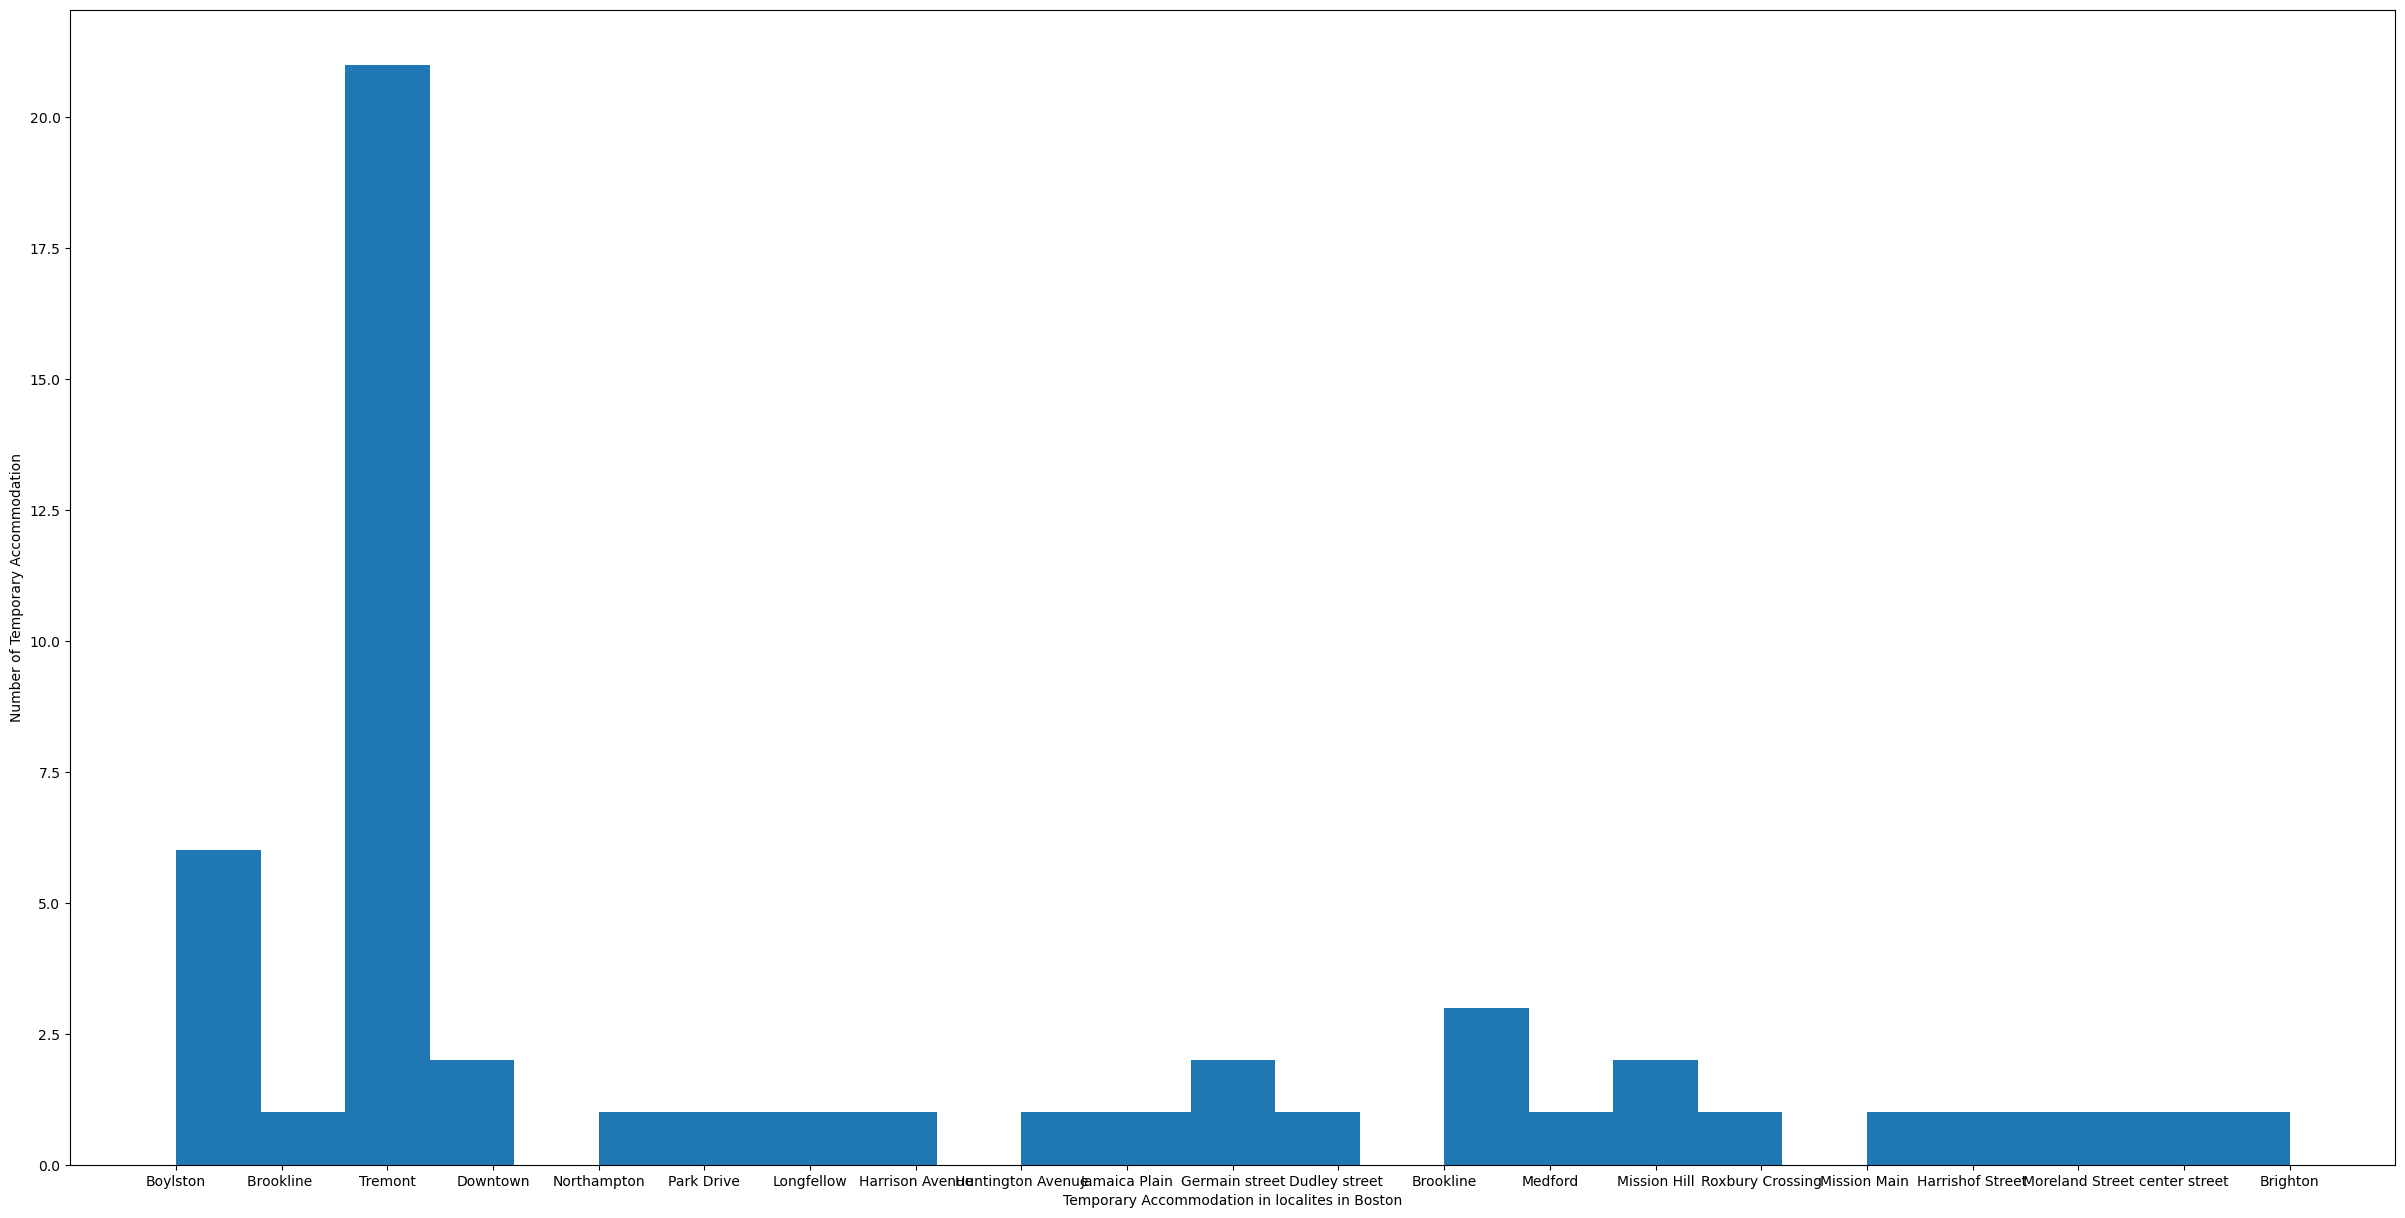

In [19]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [30.0, 15]
plt.hist(tadf['locality'], bins = 25)
plt.yscale('linear')

plt.xlabel('Temporary Accommodation in localites in Boston')
plt.ylabel('Number of Temporary Accommodation')


plt.show()

In [20]:
tadf['gender'] = tadf['gender'].str.replace('GIRLs', 'GIRL')

Text(0.5, 0, 'Temporary Accommodation availability based on spot type')

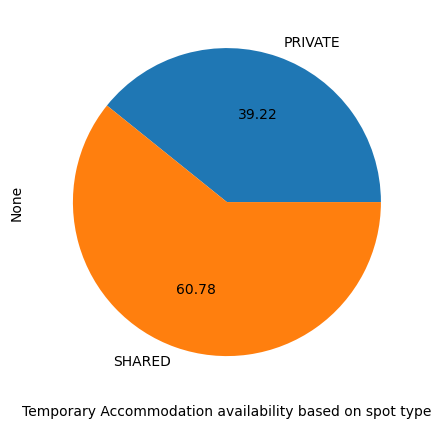

In [21]:
plt.rcParams["figure.figsize"] = [10, 5]
tadf.groupby('spot').size().plot(kind='pie', autopct='%.2f')
plt.xlabel("Temporary Accommodation availability based on spot type")

Text(0.5, 0, 'Temporary Accommodation availability based on gender')

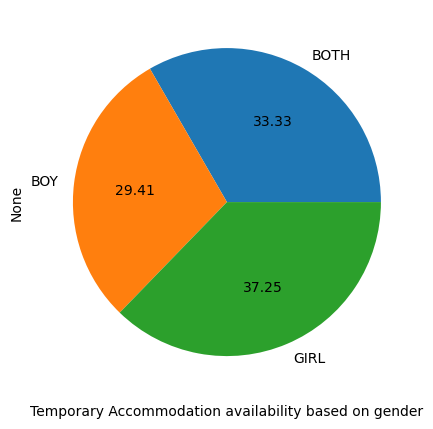

In [22]:
tadf.groupby('gender').size().plot(kind='pie', autopct='%.2f')
plt.xlabel("Temporary Accommodation availability based on gender")

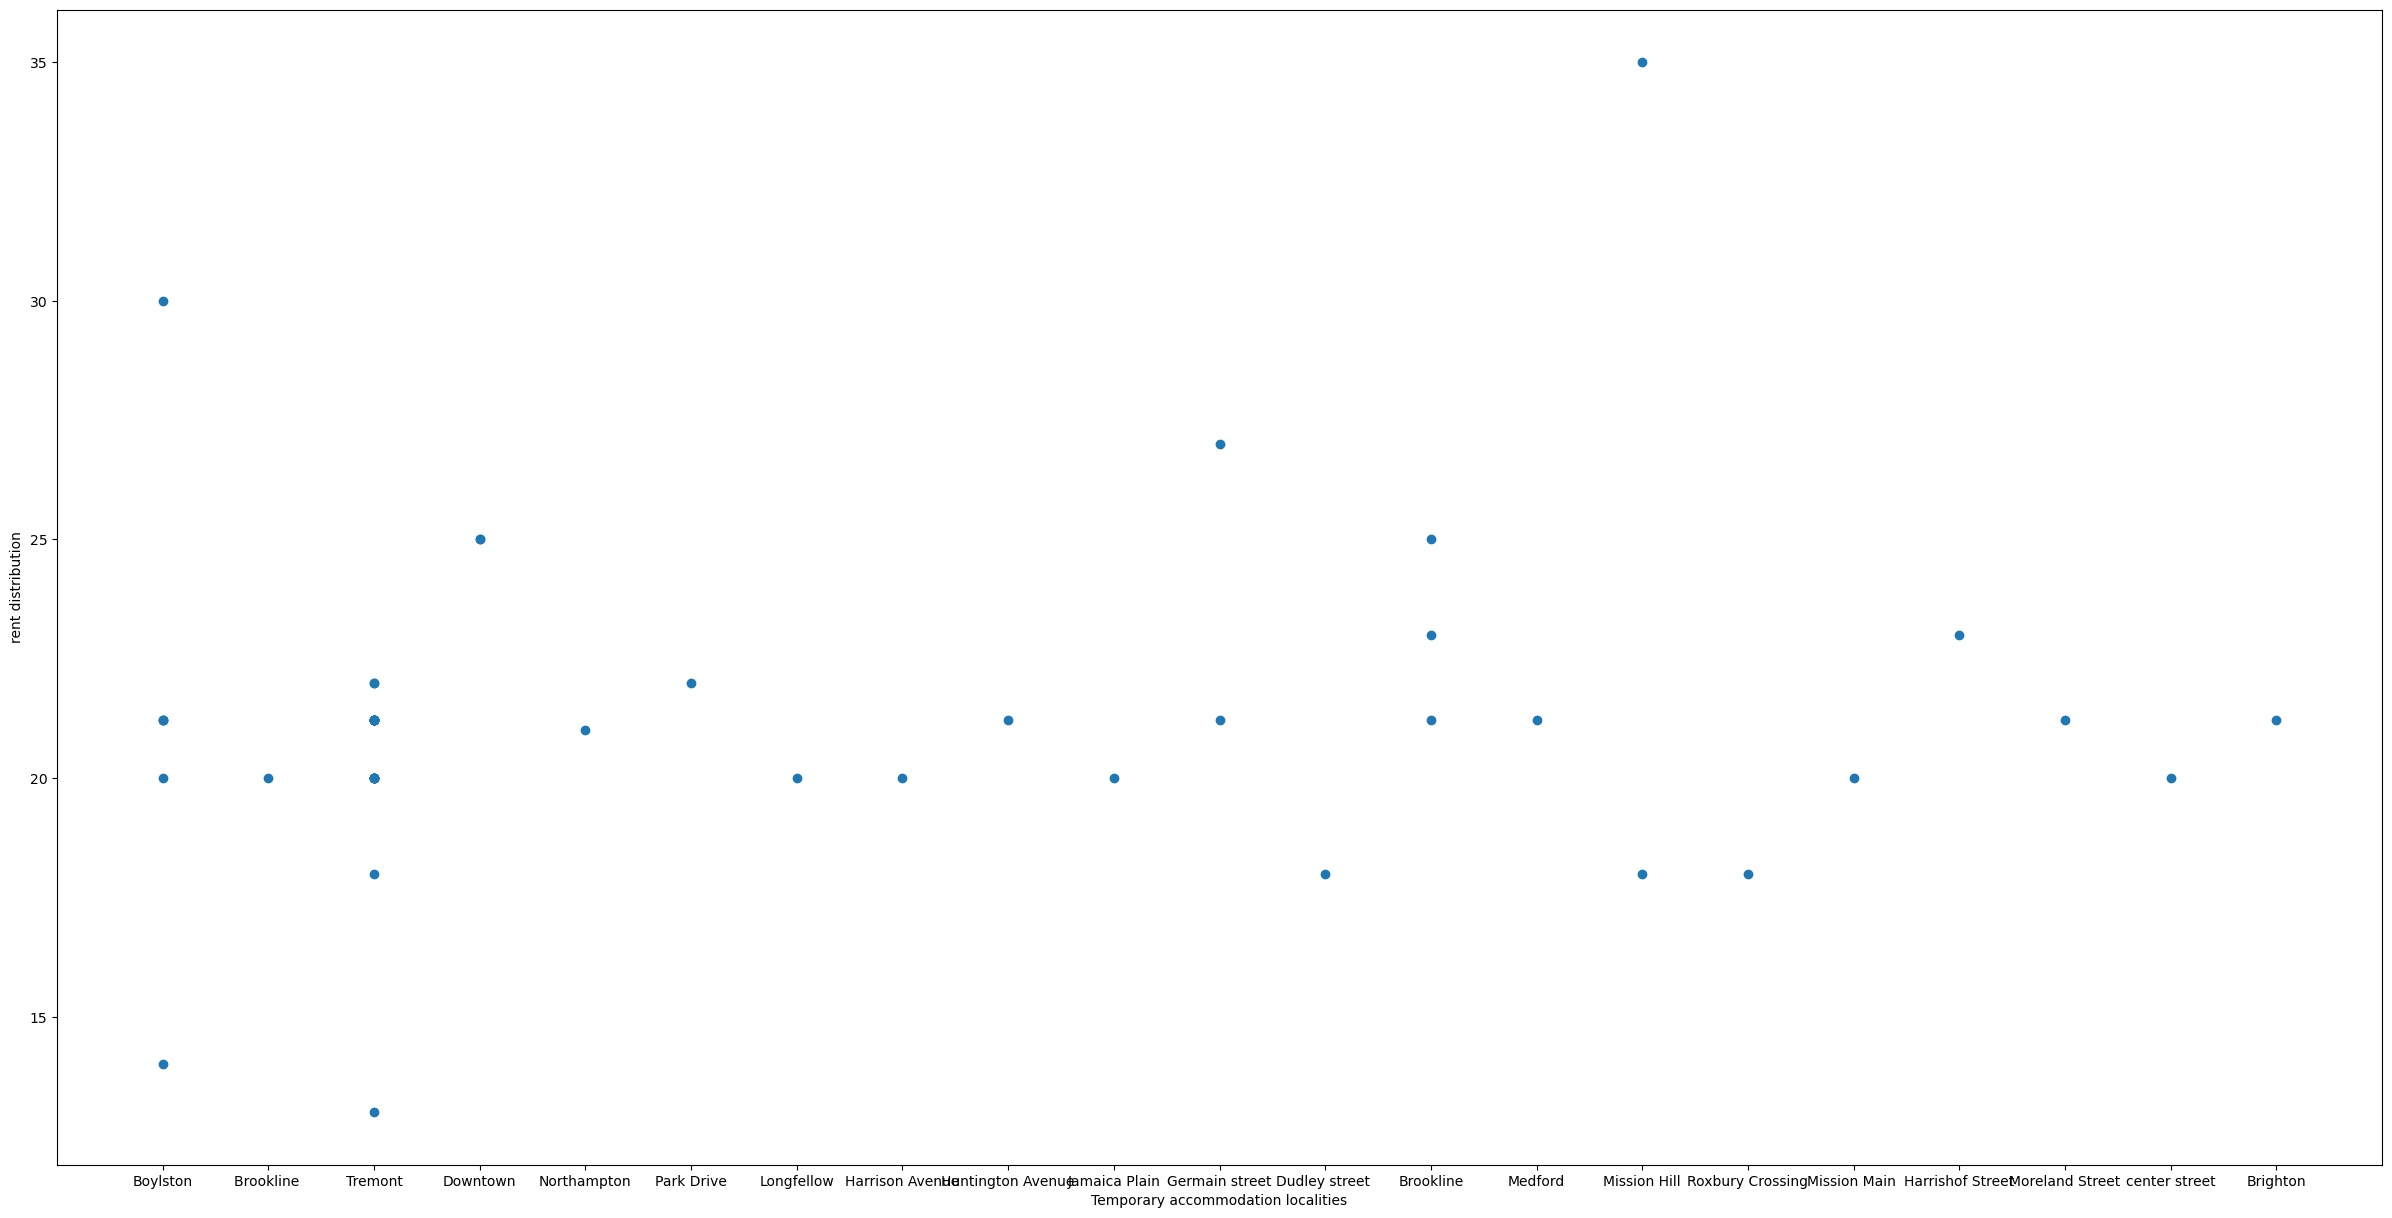

In [23]:
import matplotlib.pyplot as plt

# Make a line plot: year on the x-axis, pop on the y-axis

topLocalities = tadf['locality'].value_counts()[:5].sort_values(ascending=False)
plt.rcParams["figure.figsize"] = [30, 15]
plt.scatter(tadf['locality'],tadf['rent'])


plt.xlabel("Temporary accommodation localities")
plt.ylabel("rent distribution")

# Display the plot with plt.show()

plt.show()

In [24]:
temporaryAccommodationPostedusers = tadf.loc[:,['name', 'number']]
temporaryAccommodationPostedusers = temporaryAccommodationPostedusers.rename(columns={"number": "contact"})
# print(display(HTML(temporaryAccommodationPostedusers.to_html())))

In [25]:
permanentAccommodationUsers = padf.loc[:,['name', 'contact']]
# print(display(HTML(permanentAccommodationUsers.to_html())))

In [26]:
allusers = pd.concat([permanentAccommodationUsers,temporaryAccommodationPostedusers])

In [27]:
allusers

,name,contact
0,Neha,16172384663
1,Shikha,16092556159
2,Akilesh,18573951538
3,Manaswini,18573816342
4,Ketan Chugni,18573767895
...,...,...
46,Aditi Reddy,9402991591
47,Girish,18573701801
48,Rupa,8574923818
49,Niranjan,6179554772


In [28]:
allusers.drop_duplicates(subset='contact',inplace=True, keep='first')

allusers.reset_index(drop=True, inplace=True)

# allusers

In [29]:
from sqlalchemy import create_engine, MetaData, Table, delete, insert
import pymysql

user = 'root'
password = 'nageshsairam1234'
host = '127.0.0.1'
port = 3306
database = 'accommodationDB'

engine = create_engine(url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(user, password, host, port, database))

connection = engine.connect()
metadata = MetaData()
users = Table('user', metadata, autoload=True, autoload_with=engine)
permanentaccommodationTable = Table('permanentaccommodation', metadata, autoload=True, autoload_with=engine)


# delete temporary accommodation table

temporaryaccommodationTable = Table('temporaryaccommodation', metadata, autoload=True, autoload_with=engine)

connection.execute(delete(temporaryaccommodationTable))

# delete permanent accommodation table

permanentaccommodationTable = Table('permanentaccommodation', metadata, autoload=True, autoload_with=engine)

connection.execute(delete(permanentaccommodationTable))

delete_stmt = delete(users)
connection.execute(delete_stmt)
# allusers.to_sql(con=engine, name='user', index=True, if_exists='replace')



In [30]:
padf.to_sql(con=engine, name='permanentaccommodation', index=True, if_exists='replace')

60

In [31]:
allusers['name'].fillna(value='', inplace=True)
for index, row in allusers.iterrows():
    insert_stmt = insert(users).values(userid = index, name = row['name'], contact = row['contact'])
    results = connection.execute(insert_stmt)

In [32]:
# tadf.to_sql(con=engine, name='temporaryaccommodation', index=True, if_exists='replace')

tadf['vacancy'].replace('', 0 , inplace=True)
tadf['vacancy'].fillna(0 , inplace=True)



for index, row in tadf.iterrows():
    insert_stmt = insert(temporaryaccommodationTable).values(address= row['address'], locality = row['locality'],rent = row['rent'], start= row['start'],end =row['end'], gender=row['gender'], name= row['name'], number= row['number'], vacancy=row['vacancy'], spot= row['spot'], description=row['description'])
    results = connection.execute(insert_stmt)
    

In [33]:
padf.fillna('', inplace= True)
padf['vacancy'].replace('', 0 , inplace=True)
padf['bath'].replace('', 1 , inplace=True)
padf['bed'].replace('', 1 , inplace=True)

for index, row in padf.iterrows():
    insert_stmt = insert(permanentaccommodationTable).values(address= row['address'],  location = row['location'], rent = row['rent'], roomtype= row['roomtype'], gender=row['gender'], vacancy=row['vacancy'], bed= row['bed'],bath=row['bath'], apartment_type = row['apartment_type'],  start = row['start'], end = row['end'], spot= row['spot'], name= row['name'], contact= row['contact'], description=row['description'])
    results = connection.execute(insert_stmt)


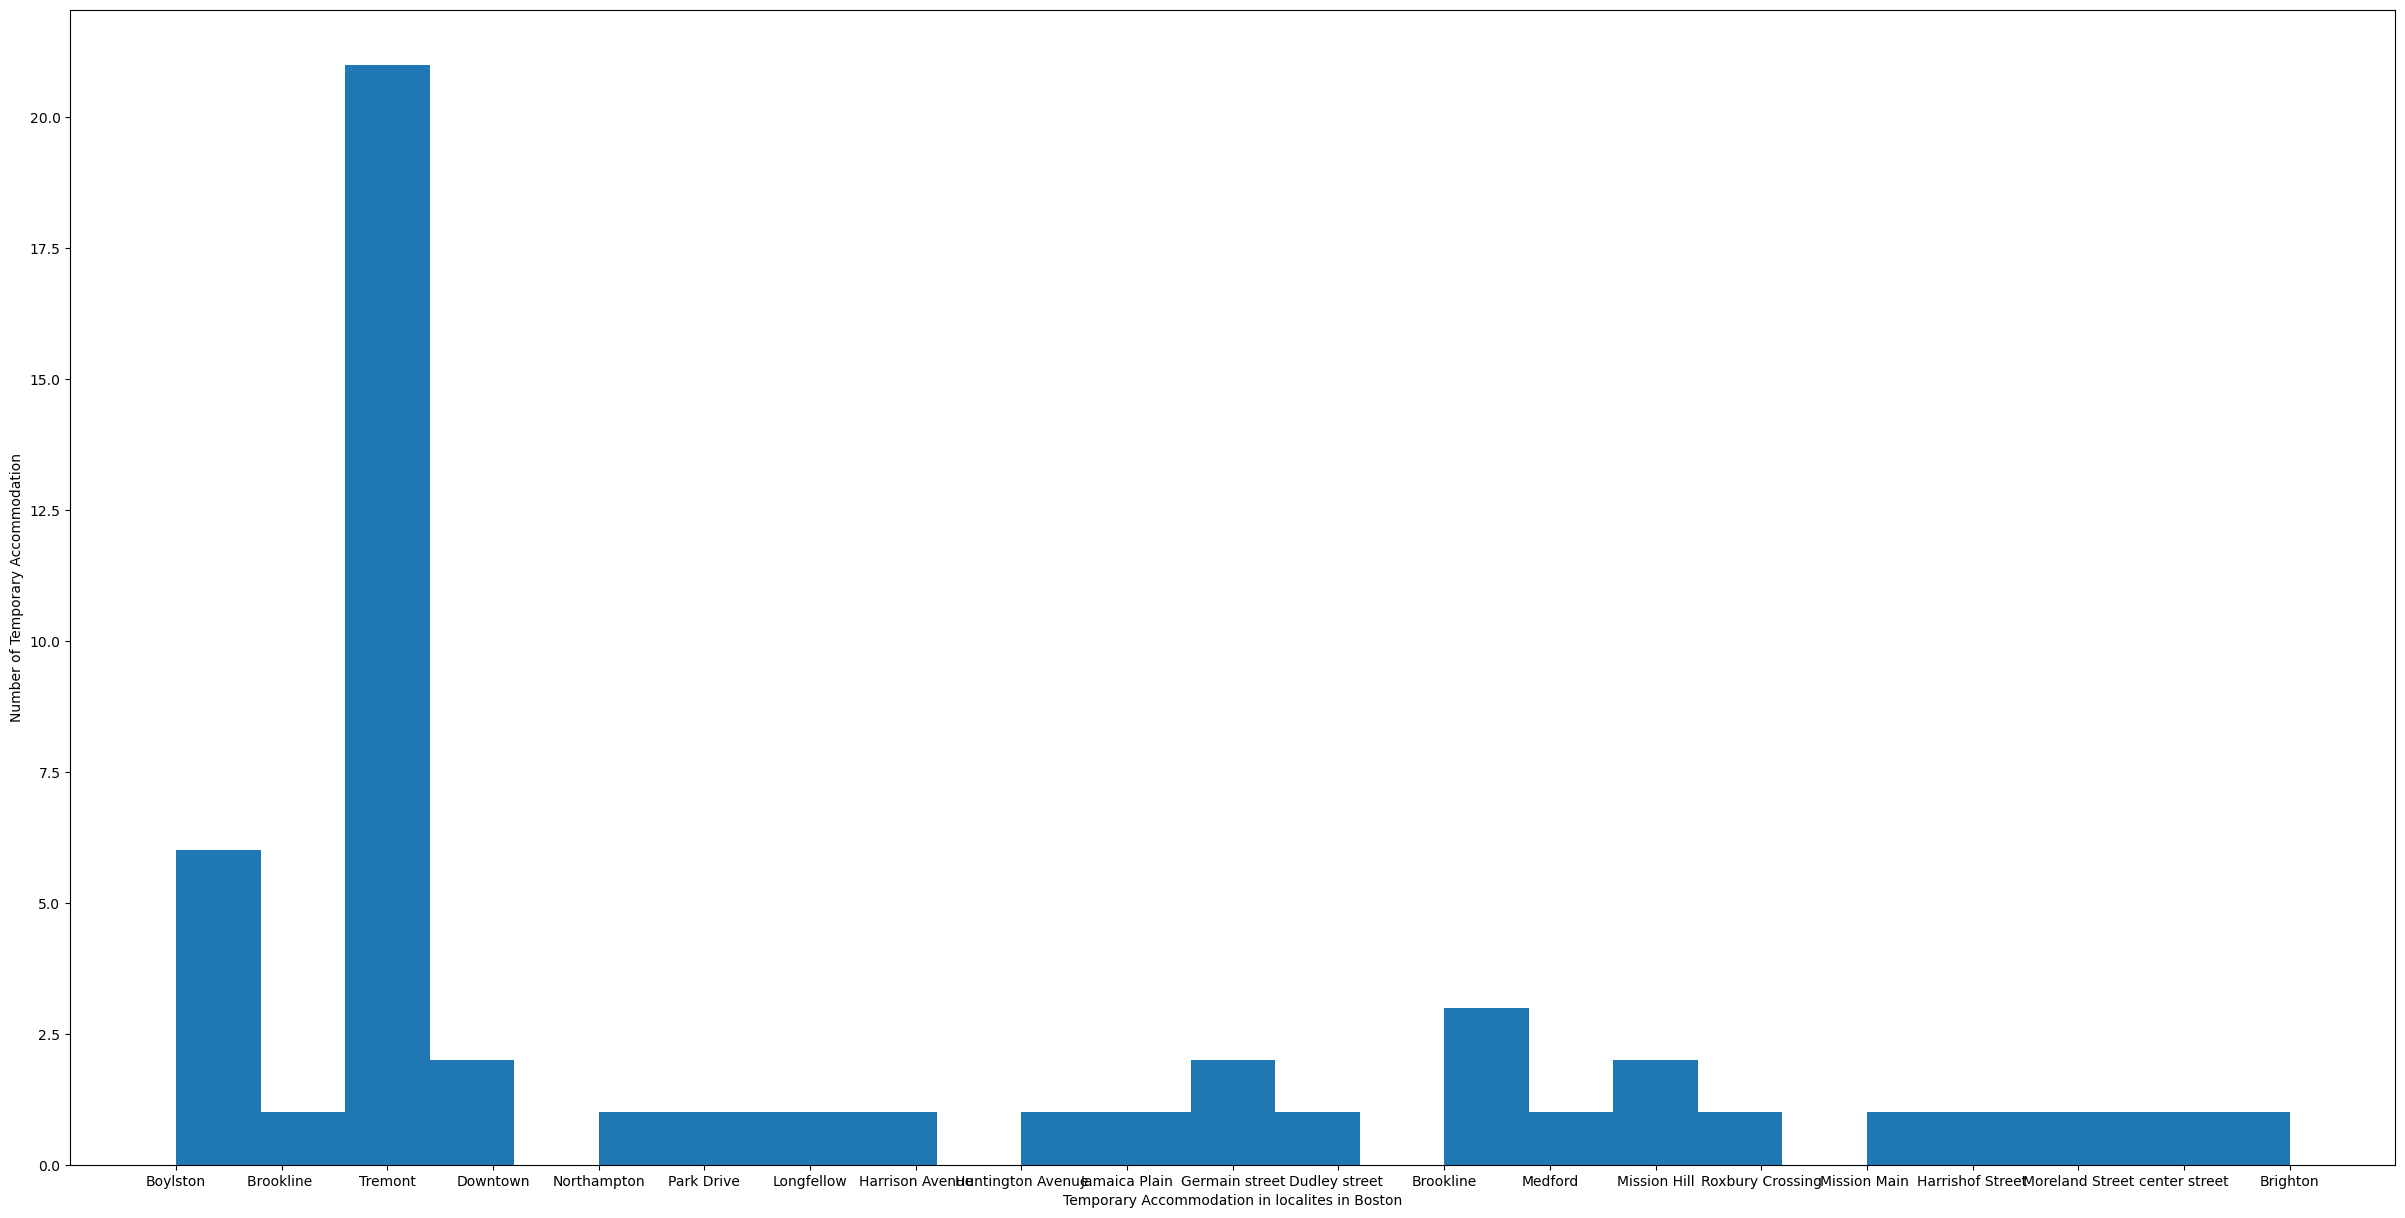

In [34]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [30.0, 15]
plt.hist(tadf['locality'], bins = 25)
plt.yscale('linear')

plt.xlabel('Temporary Accommodation in localites in Boston')
plt.ylabel('Number of Temporary Accommodation')


plt.show()

Text(0.5, 0, 'Room type')

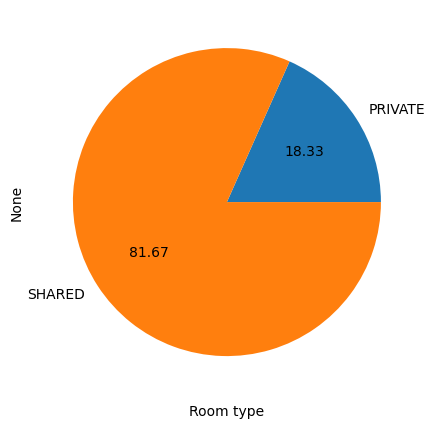

In [35]:
plt.rcParams["figure.figsize"] = [10, 5]
padf.groupby('roomtype').size().plot(kind='pie', autopct='%.2f')
plt.xlabel("Room type")